# Example 1: Creating a Synthetic Dataset (MarginalSynthesizer)
In this notebook we show you how to create a simple synthetic dataset.

# Environment

## Library Imports

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Jupyter-specific Imports and Settings

In [2]:
# set printing options
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')

get_ipython().run_line_magic('autoreload', '2')
from importlib import reload

## Import Synthesizer
For this example we will use the MarginalSynthesizer algorithm. As the name suggests, this algorithm generates data based on the marginal distributions of each column that exists in the input dataset. In other words, the output synthetic data will have similar counts for each feature but the relations between features are likely not preserved. Hence, this approach is rather naive as most statistical patterns are not captured. However, it will work with datasets of any shape or size - and run relatively quickly as well. 

In [3]:
from synthesis.hist_synthesis import MarginalSynthesizer

# Synthetic Data Generation
Let's load a dataset to see how the generation process works.

In this case, we will use the adult dataset - source: https://archive.ics.uci.edu/ml/datasets/adult

In [4]:
df = pd.read_csv('../data/input/adult.csv', delimiter=', ', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We will now import our synthesizer and fit it on the input data. 

Additionally we can specify the 'epsilon' value, which according to the definition of differential privacy is used to quantify the privacy risk posed by releasing statistics computed on sensitive data. More on that here: https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf

In short, a lower value of epsilon will result in more randomness and v.v.

In [5]:
epsilon = 0.1

ms = MarginalSynthesizer(epsilon=epsilon)
ms.fit(df)

Column fitted: age
Column fitted: workclass
Column fitted: fnlwgt
Column fitted: education
Column fitted: education-num
Column fitted: marital-status
Column fitted: occupation
Column fitted: relationship
Column fitted: race
Column fitted: sex
Column fitted: capital-gain
Column fitted: capital-loss
Column fitted: hours-per-week
Column fitted: native-country
Column fitted: income


MarginalSynthesizer(epsilon=0.1)

After our synthesizer has fitted the structure of the original data source, we can now use it to generate a new dataset.

In [6]:
df_synth = ms.transform(df)

Column sampled: age
Column sampled: workclass
Column sampled: fnlwgt
Column sampled: education
Column sampled: education-num
Column sampled: marital-status
Column sampled: occupation
Column sampled: relationship
Column sampled: race
Column sampled: sex
Column sampled: capital-gain
Column sampled: capital-loss
Column sampled: hours-per-week
Column sampled: native-country
Column sampled: income


We now obtained a new dataset which looks very similar to the original one.

In [7]:
df_synth.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Self-emp-not-inc,204653,HS-grad,16,Never-married,Craft-repair,Husband,Black,Male,0,0,40,United-States,>50K
1,77,Private,221452,HS-grad,6,Married-civ-spouse,Farming-fishing,Unmarried,White,Male,10520,0,30,United-States,<=50K
2,36,Private,73211,Bachelors,3,Married-spouse-absent,Machine-op-inspct,Husband,White,Male,0,0,5,United-States,>50K
3,84,Private,240358,11th,10,Married-civ-spouse,Sales,Husband,Black,Male,0,1579,15,United-States,<=50K
4,25,Private,81154,Some-college,13,Divorced,Craft-repair,Not-in-family,White,Female,0,1944,40,Mexico,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Utility Evaluation
NOTE: this section will be extended in the near future.

In order to evaluate the output we can examine the feature distances for each attribute, i.e. we compares the value counts for each column in the original with the synthetic dataset.

In [9]:
from synthesis.evaluation import visual

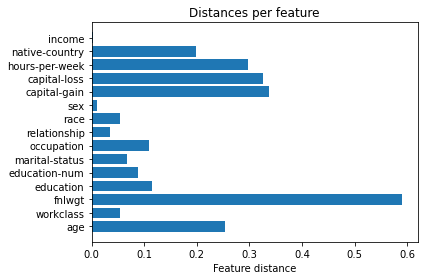

In [10]:
visual.plot_feature_distances(df, df_synth)

Just to make sure, let's generate data with a much higher level of epsilon and see whether we get improved utility. 

In [11]:
epsilon_100 = 100
ms_100 = MarginalSynthesizer(epsilon=epsilon_100)
ms_100.fit(df)
df_synth_100 = ms_100.transform(df)

Column fitted: age
Column fitted: workclass
Column fitted: fnlwgt
Column fitted: education
Column fitted: education-num
Column fitted: marital-status
Column fitted: occupation
Column fitted: relationship
Column fitted: race
Column fitted: sex
Column fitted: capital-gain
Column fitted: capital-loss
Column fitted: hours-per-week
Column fitted: native-country
Column fitted: income


MarginalSynthesizer(epsilon=100)

Column sampled: age
Column sampled: workclass
Column sampled: fnlwgt
Column sampled: education
Column sampled: education-num
Column sampled: marital-status
Column sampled: occupation
Column sampled: relationship
Column sampled: race
Column sampled: sex
Column sampled: capital-gain
Column sampled: capital-loss
Column sampled: hours-per-week
Column sampled: native-country
Column sampled: income


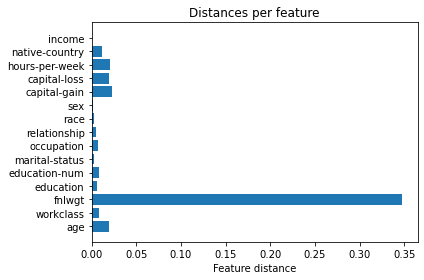

In [12]:
visual.plot_feature_distances(df, df_synth_100)

As we expect, the feature counts in the synthetic data are much closer to the original with a higher level of epsilon.

Notice that fnlwght is a continuous column with many unique values, thus it is unlikely that all of these values are sampled in the synthetic data.

Below we compare the value counts of each feature individually. 

In [14]:
visual.compare_value_counts(df, df_synth)

age
    real  synthetic
17   395        245
18   550        441
19   712        780
20   753        384
21   720         96
22   765        560
23   877        677
24   798        564
25   841        739
26   785        636
27   835        845
28   867       1512
29   813        707
30   861        938
31   888        208
32   828        822
33   875        847
34   886        536
35   876        751
36   898        608
37   858        606
38   827        684
39   816        468
40   794        754
41   808        922
42   780        579
43   770        469
44   724        179
45   734        826
46   737        857
47   708        432
48   543        444
49   577        791
50   602        351
51   595        142
52   478        873
53   464        653
54   415        708
55   419        600
56   366        794
57   358        464
58   366        417
59   355        407
60   312        234
61   300         74
62   258        236
63   230        657
64   208        296
65   178        

We have yet to evaluate the pattern preservation between features, but we do not expect that this particular algorithm will have captured those well.